# Millikan's Oil Drop Experiment
### By: Sean Jaffe

## **Theory:**
What was Millikan's oil drop experiment? It was an experiment in which millikan determined a way to calculate the charge of an oil drop. This was really important because after getting a ton of charge values, Millikan noticed that they were all multiples of a very special number, the elementary charge (1.602e-19), the charge of a single electron or proton. This makes sense because a particle has an integer number of electrons and protons (you can't have half of one) so the charge of a object will always be the charge of one times the difference between the number of protons and electrons.\
\
That is all well and good, but how did Millikan do this?\
With 3 simple steps:
1. A mist of oil droplets is sprayed into the air where they become charged. 
2. The drops are allowed to fall and reach terminal velocity, the radius of the drop can then be calculated using that velocity
3. Then the known electric field was turned on, after once again allowing the drop to reach terminal velocity, the charge is calculated using the radius and terminal velocity with the field

We need the second step because we first need to know the drop's radius, but the oil drops are tiny (with radii in the micrometers) so he can't just measure it with a ruler. Terminal velocity is reached when the net force (sum of the forces) is 0, which is useful because we can create a big equation with a single unknown and solve for it. In this case the force of gravity down is equal to the force of drag up. Drag is directly proportional to the radius and the force of gravity can also be calculated with respect to radius. This way the only unknown variable in the equation is the radius, allowing us to calculate it. The same approach is used once the elctric field is turned on. Adding the electric force adds charge to the equation, and because we know the radius from before, the only unknown is the charge, easy to solve for.\
*Note: The velocity can be calculated with $\frac{\triangle x}{\triangle y}$; even though it is average velocity rather than instantaneous velocity, it doesn't matter because the velocity is constant once it reaches terminal velocity*

## **Math:**
**Defining variables:** \
$\eta =$ viscosity of air\
$\rho =$ density of oil\
$\rho_{air} =$density of air\
$g =$ acceleration due to gravity\
$V =$ voltage between plates\
$d =$ distance between parallel plates\
$v_1 =$ terminal velocity with no field\
$v_2 =$ terminal velocity with field with voltage V\
$r =$ radius of droplet\
$q =$ unknown charge of droplet

**Defining force equations:** \
$F_g=mg=(Vol)(\rho - \rho_{air})g=-\frac{4}{3} \pi r^3 (\rho - \rho_{air})g =$ force of gravity\
$F_d=-6 \pi r \eta v_1 =$ force of drag\
$F_e = \frac{qV}{d} =$ electric force\
$F_{net} = 0$  when constant velocity

**Work:** \
With no electric field: $0=F_g+F_d$ 
$$-F_d=F_g$$
$$6 \pi r \eta v_1 = -\frac{4}{3} \pi r^3 (\rho - \rho_{air})g$$
$$r=\sqrt{\frac{9 \eta v_1}{2 g (\rho - \rho_{air})}}$$

With electric field: $0=F_g+F_d+F_e$
$$F_e=-F_g-F_d$$
$$F_e=-(-F_d(v_1))-F_d(v_2)$$
$$\frac{qV}{d} = (-6 \pi r \eta v_1) - (-6 \pi r \eta v_2)$$
$$\frac{qV}{d} = 6 \pi r \eta (v_2 - v_1)$$
$$q = 6 \pi r \eta (v_2 - v_1)\frac{d}{V}$$

Can be combined into:
$$q = 6 \pi \eta \sqrt{\frac{9 \eta v_1}{2 g (\rho - \rho_{air})}} (v_2 - v_1)\frac{d}{V}$$

## **Set Up:**

First thing is first, lets import the things we need. Numpy is used for the better arrays that they have, matplotlib is used for the graphs, and the rest is self explanitory

In [53]:
import numpy as np
from matplotlib import pyplot as plt

import random
from math import floor, sqrt, pi

### Constants

Lets define the elementary charge, the charge of electrons and protons, the value that we want to find using this simulation

In [54]:
elementary_charge = 1.602e-19

Lets define some other constants that we will use

In [55]:
g = -9.81
visc_air = 1.82e-5
dens_air = 1.22
dens_oil = 867.0

Lets also define some values to use for our specific simulation

In [56]:
voltage = 0.0
d_plates = 0.35

dt = 0.001

### Class and functions

Most important part, lets define a class for a drop. It initializes itself with a randomized radius and charge and has functions that calculate the forces to get the acceleration which is then used to calculate the position.

In [57]:
class Drop:
    def __init__(self):
        self.new_drop()

    def new_drop(self):
        self.radius = (random.random() + 0.2) * 5e-5
        self.mass = 4.0 * pi * self.radius ** 3 * (dens_oil - dens_air) / 3.0
        self.q = floor(random.random() * 10 + 6) * elementary_charge  # random number from 6 to 15 times elementary charge
        
        self.reset()
        
    def reset(self):
        self.Fg = self.mass * g
        self.Fd = 0.0
        self.Fe = 0.0
        
        self.ay = 0.0
        self.vy = 0.0
        self.y = 100.0 * 1e-6  # 100 micrometers
        
        self.time = 0.0
    
    def forward_sim(self):
        self.Fe = voltage * self.q / d_plates
        self.Fd = -6 * pi * visc_air * self.radius * self.vy
        
        self.ay = (self.Fd + self.Fg + self.Fe) / self.mass
        self.vy += self.ay * dt
        self.y += self.vy * dt
        self.time += dt
    
    def back_sim(self):
        #incomplete, doesn't recalc acceleration
        self.vy -= self.ay * dt
        self.y -= self.vy * dt
        self.time -= dt
        
    
    def move_projectile(self):
        self.forward_sim()
        #wait and recersively call
    
    def get_data(self):
        return (self.time, self.y, self.vy, self.ay)

Now we want to create the functions that can run our experiment and gather data on a lot of drops

In [58]:
def run_sim(p_drops, p_simtim):
    # takes a list of drops and the total time we want the simulation to run for
    # returns an array with all the data from the simulation (including acceleration and velocity for debugging and explanitory purposes)
    steps = int(p_simtim / dt)

    data = []

    for i in range(steps):
        for drop in drops:
            drop.move_projectile()

        data.append([drop.get_data() for drop in drops])
    
    return np.array(data)
    # data is indexed with [step number][particle][desired data index]
    
def reset_all(p_drops):
    # resets the positions of all the drops
    for drop in p_drops:
        drop.reset()

Now lets create the functions to solve for the radius and the charge using the equations we derived above. No cheating here, we only can use position and time data, no acceleration or velocity (we calculate the velocity from the position and time).

In [59]:
def solve_for_r(v1):
    return sqrt(9 * visc_air * v1 / (2 * g * (dens_oil - dens_air)))

def solve_for_q(v1, v2):
    r = solve_for_r(v1)  
    return 6 * pi * r * visc_air * (v2-v1) * d_plates / voltage

def terminal_vel(data, particle_num):
    # delta y / delta t
    # While it is average velocity rather than instantaneous velocity, it doesn't matter because the velocity is constant
    # The [-1] and [-2] get the last and the second to last data point respectively
    # The [1] specifies that we want the position data
    return (data[-1][particle_num][1] - data[-2][particle_num][1])/dt

## **Running the Experiment:**

Lets use 250 drops and simulate for 1 second. Using the functions already defined, running and getting the data is easy (just got to remember to reset all the drops after using them in the first round)

In [60]:
num_drops = 250
sim_time = 0.25

drops = [Drop() for _ in range(num_drops)]

voltage = 0
no_field_data = run_sim(drops, sim_time)

reset_all(drops)

voltage = 1e9
with_field_data = run_sim(drops, sim_time)

Lets plot all the data we just got to make sure everything looks all right

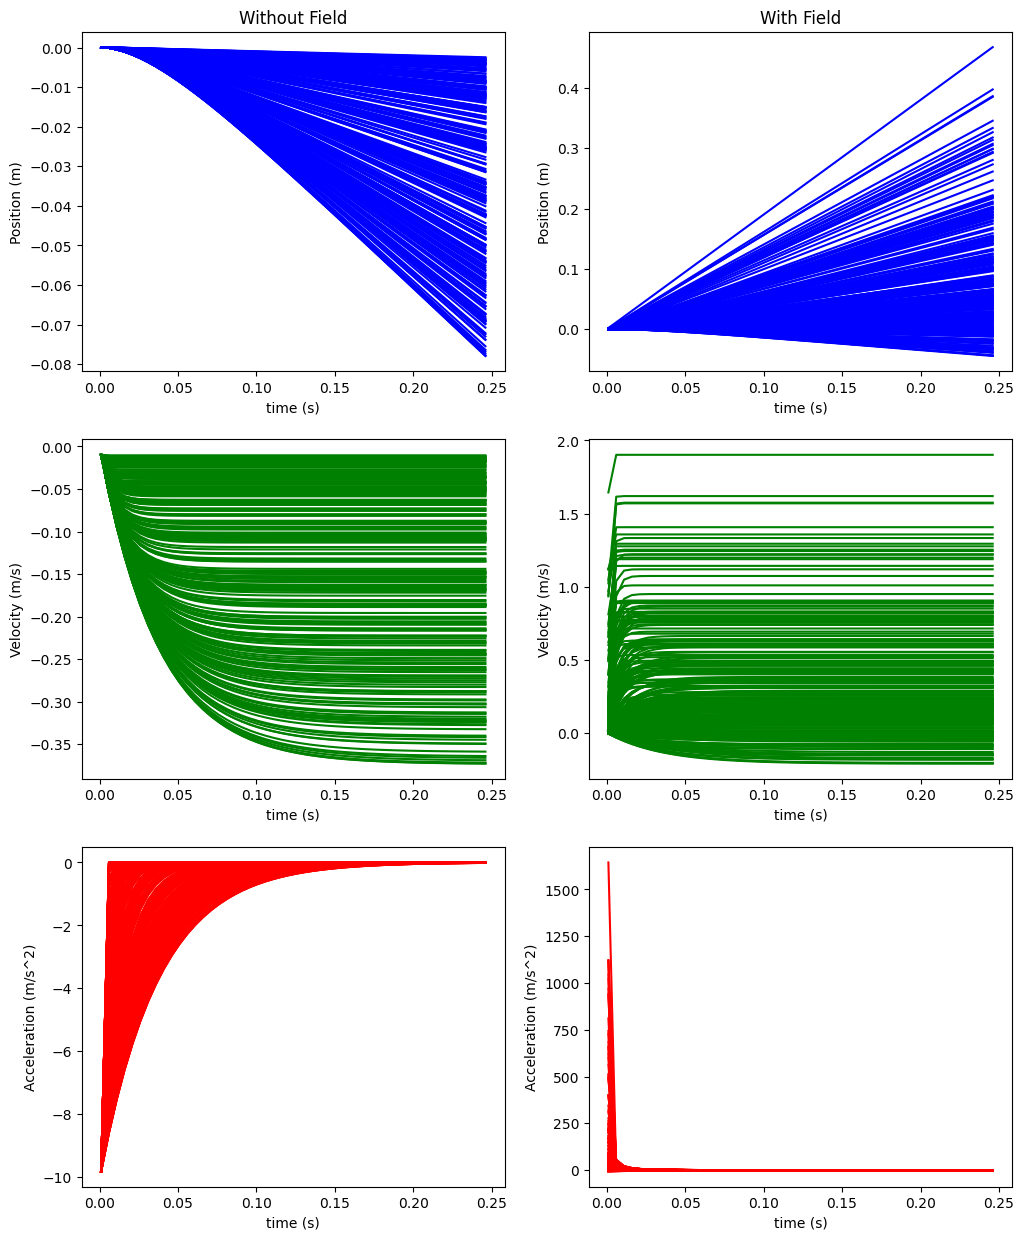

In [61]:
num_particles_show = 250  # drawing all 250 particles would take a lot of time and look messy

part_step = len(no_field_data) // num_particles_show

datas = [no_field_data[::5, ::part_step], with_field_data[::5, ::part_step]]
x = no_field_data[::5, ::part_step, 0]  # gets times

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

axs[0][0].set_title("Without Field")
axs[0][1].set_title("With Field")


for i in range(2):
    # i = 0 is with no field data
    # i = 1 is with field data
    axs[0][i].plot(x, datas[i][:, :, 1], 'b')
    axs[0][i].set_ylabel('Position (m)')
    axs[0][i].set_xlabel('time (s)')

    axs[1][i].plot(x, datas[i][:, :, 2], 'g')
    axs[1][i].set_ylabel('Velocity (m/s)')
    axs[1][i].set_xlabel('time (s)')

    axs[2][i].plot(x, datas[i][:, :, 3], 'r')
    axs[2][i].set_ylabel('Acceleration (m/s^2)')
    axs[2][i].set_xlabel('time (s)')

Looks good to me, the position graphs become linear toward the end so they have reached terminal velocity. (also the velocity flattens out and the acceleration becomes 0, but that is data we wouldn't know from just observing the experiment)

## **Analysis:**

Now lets use all that data we just collected to calculate the radius and charge of each drop

In [62]:
radii = []
charges = []
for i in range(len(drops)):
    v_no_field = terminal_vel(no_field_data, i)
    v_with_field = terminal_vel(with_field_data, i)
    
    radii.append(solve_for_r(v_no_field) * 1e6)  # the "* 1e6" converts to um
    charges.append(solve_for_q(v_no_field, v_with_field))

Once again lets graph it. Lets also compare it to the real radius and charges just to see how accurate we were.

Text(0.5, 0, 'Radii (um)')

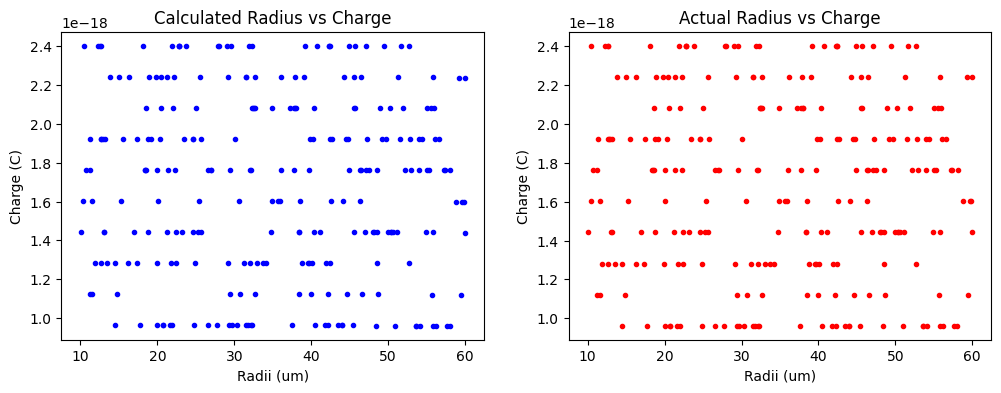

In [63]:
true_radii = [drop.radius * 1e6 for drop in drops]  # *1e6 converts to um
true_charge = [drop.q for drop in drops]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(radii, charges, 'b.')
ax1.set_title("Calculated Radius vs Charge")
ax1.set_ylabel("Charge (C)")
ax1.set_xlabel("Radii (um)")

ax2.plot(true_radii, true_charge, 'r.')
ax2.set_title("Actual Radius vs Charge")
ax2.set_ylabel("Charge (C)")
ax2.set_xlabel("Radii (um)")

Nice, the two graphs seem to line up perfectly so we are on the right track, now we just need to use this to find the elementary charge...

There seem to be descrete values that the charge can take because there are horizontal lines at specific charges. Each jump in charge must be the effect of having one less electron, meaning that the difference between each of these charges must be the charge of an electron. Before we can do that though we first want to group together all these charges that are essentially the same. There are slight differences in their values due to rounding errors so lets average them together. We can check to see if charges are "the same" by checking if their difference is within a certain tolerance of each other and average all the charges within each group of "the same" charges to get one value for each.

*Note: there is no correlation between radius and charge because they are separately randomized*

In [64]:
tolerance = 1e-20

sorted_charges = sorted(charges)  # sorts it so it groups the similar charges together

averaged_charges = []
accumulated_charge = sorted_charges[0]
items=1
for i in range(1, len(sorted_charges)):
    if sorted_charges[i]-sorted_charges[i-1] < tolerance:  # checks if the difference is very small
        accumulated_charge += sorted_charges[i]
        items += 1
    else:
        averaged_charges.append(accumulated_charge/items)  # takes the average of the previous group because has now arrived at a different charge
        accumulated_charge = sorted_charges[i]
        items = 1
averaged_charges.append(accumulated_charge/items)

Text(0, 0.5, 'Charge (C)')

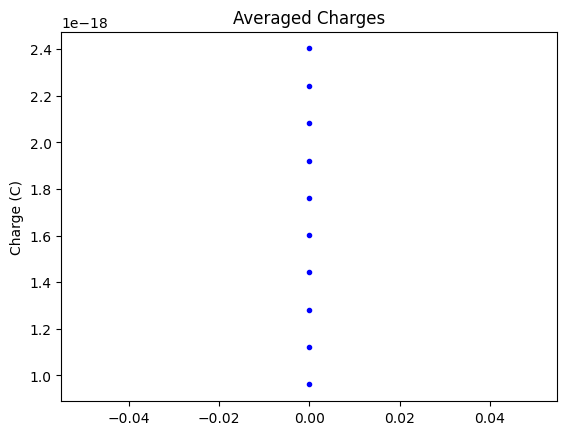

In [71]:
plt.plot([0]* len(averaged_charges), averaged_charges,"b.")
plt.title("Averaged Charges")
plt.ylabel("Charge (C)")

This gets us a list of 10 different charges, and as we expected it looks exactly light the previous graph would if we consolidated each horizontal line to a point. Now it is much easier to find the increment each charge.

In [66]:
diffs_of_average_charges = [averaged_charges[i]-averaged_charges[i-1] for i in range(1,len(averaged_charges))]
print(f"Standard deviation: {np.std(diffs_of_average_charges)}")
diffs_of_average_charges

Standard deviation: 2.1506084748736753e-22


[1.601488126658886e-19,
 1.6037751064425902e-19,
 1.6002316835527091e-19,
 1.5987608438057893e-19,
 1.6040740157207103e-19,
 1.6031487902460048e-19,
 1.6018281857141686e-19,
 1.599828459263553e-19,
 1.6057843823881385e-19]

Text(0, 0.5, 'Charge (C)')

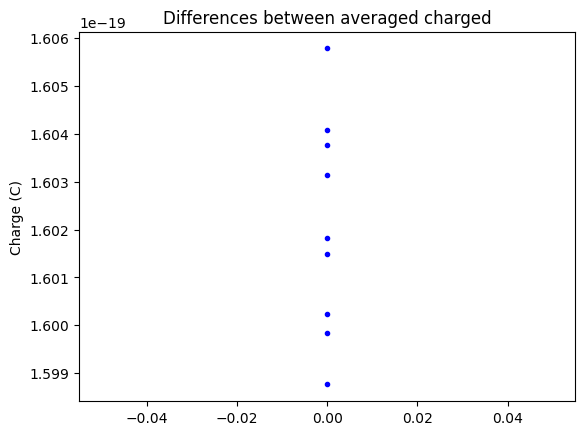

In [70]:
plt.plot([0] * len(diffs_of_average_charges), diffs_of_average_charges, "b.")
plt.title("Differences between averaged charged")
plt.ylabel("Charge (C)")

We now have a list of the 9 step sizes between the charges. They are all very similar to each other from just looking at the data and they have a tiny standard deviation, they only look spread out on the graph because the scale is so small. To get our final answer, we just average these all together to get:

In [68]:
estimated_elementary_charge = sum(diffs_of_average_charges)/len(diffs_of_average_charges)
percent_error = (estimated_elementary_charge - elementary_charge) / elementary_charge
print(f"Estimated elementary charge: {estimated_elementary_charge}")
print(f"Real elementary charge: {elementary_charge}")
print(f"Percent error: {percent_error:.4%}")


Estimated elementary charge: 1.602102177088061e-19
Real elementary charge: 1.602e-19
Percent error: 0.0064%


Good job! We got an answer that is very close to real answer. It makes sense that we wouldn't get the exact answer because there is always error with floating point math and there were many operations that occured each time causing a little more error.